In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('diamonds')

np.random.seed(42)
outlier_indices = np.random.choice(df.index, size=10, replace=False)

df.loc[outlier_indices[:5], 'price'] = df['price'].max() * 5

cols_with_missing = ['carat', 'cut', 'color', 'clarity', 'price']
for col in cols_with_missing:
    nan_indices = np.random.choice(df.index, size=15, replace=False)
    df.loc[nan_indices, col] = np.nan

duplicates = df.head(5).copy()
df = pd.concat([df, duplicates], ignore_index=True)

print("Примеры выбросов:")
print(df.loc[outlier_indices].head())

print("\nКоличество пропусков по столбцам:")
print(df.isnull().sum())

print("\nКоличество дубликатов (полных):", df.duplicated().sum())



Примеры выбросов:
       carat        cut color clarity  depth  table    price     x     y     z
1388    0.24      Ideal     G    VVS1   62.1   56.0  94115.0  3.97  4.00  2.47
50052   0.58  Very Good     F    VVS2   60.0   57.0  94115.0  5.44  5.42  3.26
41645   0.40      Ideal     E    VVS2   62.1   55.0  94115.0  4.76  4.74  2.95
42377   0.43    Premium     E    VVS2   60.8   57.0  94115.0  4.92  4.89  2.98
17244   1.55      Ideal     E     SI2   62.3   55.0  94115.0  7.44  7.37  4.61

Количество пропусков по столбцам:
carat      15
cut        15
color      15
clarity    15
depth       0
table       0
price      15
x           0
y           0
z           0
dtype: int64

Количество дубликатов (полных): 151


In [ ]:
df.to_csv('forloginom.csv', index=False)

# Новый раздел

In [ ]:
print(df.dtypes)

print(f'\n\
  Уникальные значения cut: {df['cut'].unique()}\n\
  Уникальные значения color: {df['color'].unique()}\n\
  Уникальные значения clarity: {df['clarity'].unique()}\n\
')


carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price       float64
x           float64
y           float64
z           float64
dtype: object

  Уникальные значения cut: ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', NaN]
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
  Уникальные значения color: ['E', 'I', 'J', 'H', 'F', 'G', 'D', NaN]
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
  Уникальные значения clarity: ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', NaN]
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']



In [ ]:
for col in df.select_dtypes(include=[np.float64]):
  print(f'{col}:')
  print(f'Средняя: {df[col].mean():.2f}')
  print(f'Максимальная: {df[col].max():.2f}')
  print(f'Минимальная: {df[col].min():.2f}')
  print(f'Стандартное отклонение: {df[col].std():.2f}')

freq_cut = df['cut'].value_counts()
freq_color = df['color'].value_counts()
freq_clarity = df['clarity'].value_counts()

print('\nЧастоты значений:')
print(freq_cut, '\n\n', freq_color, '\n\n',freq_clarity)


carat:
Средняя: 0.80
Максимальная: 5.01
Минимальная: 0.20
Стандартное отклонение: 0.47
depth:
Средняя: 61.75
Максимальная: 79.00
Минимальная: 43.00
Стандартное отклонение: 1.43
table:
Средняя: 57.46
Максимальная: 95.00
Минимальная: 43.00
Стандартное отклонение: 2.23
price:
Средняя: 3941.07
Максимальная: 94115.00
Минимальная: 326.00
Стандартное отклонение: 4082.93
x:
Средняя: 5.73
Максимальная: 10.74
Минимальная: 0.00
Стандартное отклонение: 1.12
y:
Средняя: 5.73
Максимальная: 58.90
Минимальная: 0.00
Стандартное отклонение: 1.14
z:
Средняя: 3.54
Максимальная: 31.80
Минимальная: 0.00
Стандартное отклонение: 0.71

Частоты значений:
cut
Ideal        21549
Premium      13787
Very Good    12079
Good          4906
Fair          1609
Name: count, dtype: int64 

 color
G    11291
E     9796
F     9539
H     8301
D     6773
I     5421
J     2809
Name: count, dtype: int64 

 clarity
SI1     13062
VS2     12256
SI2      9192
VS1      8170
VVS2     5065
VVS1     3654
IF       1790
I1        741
Nam

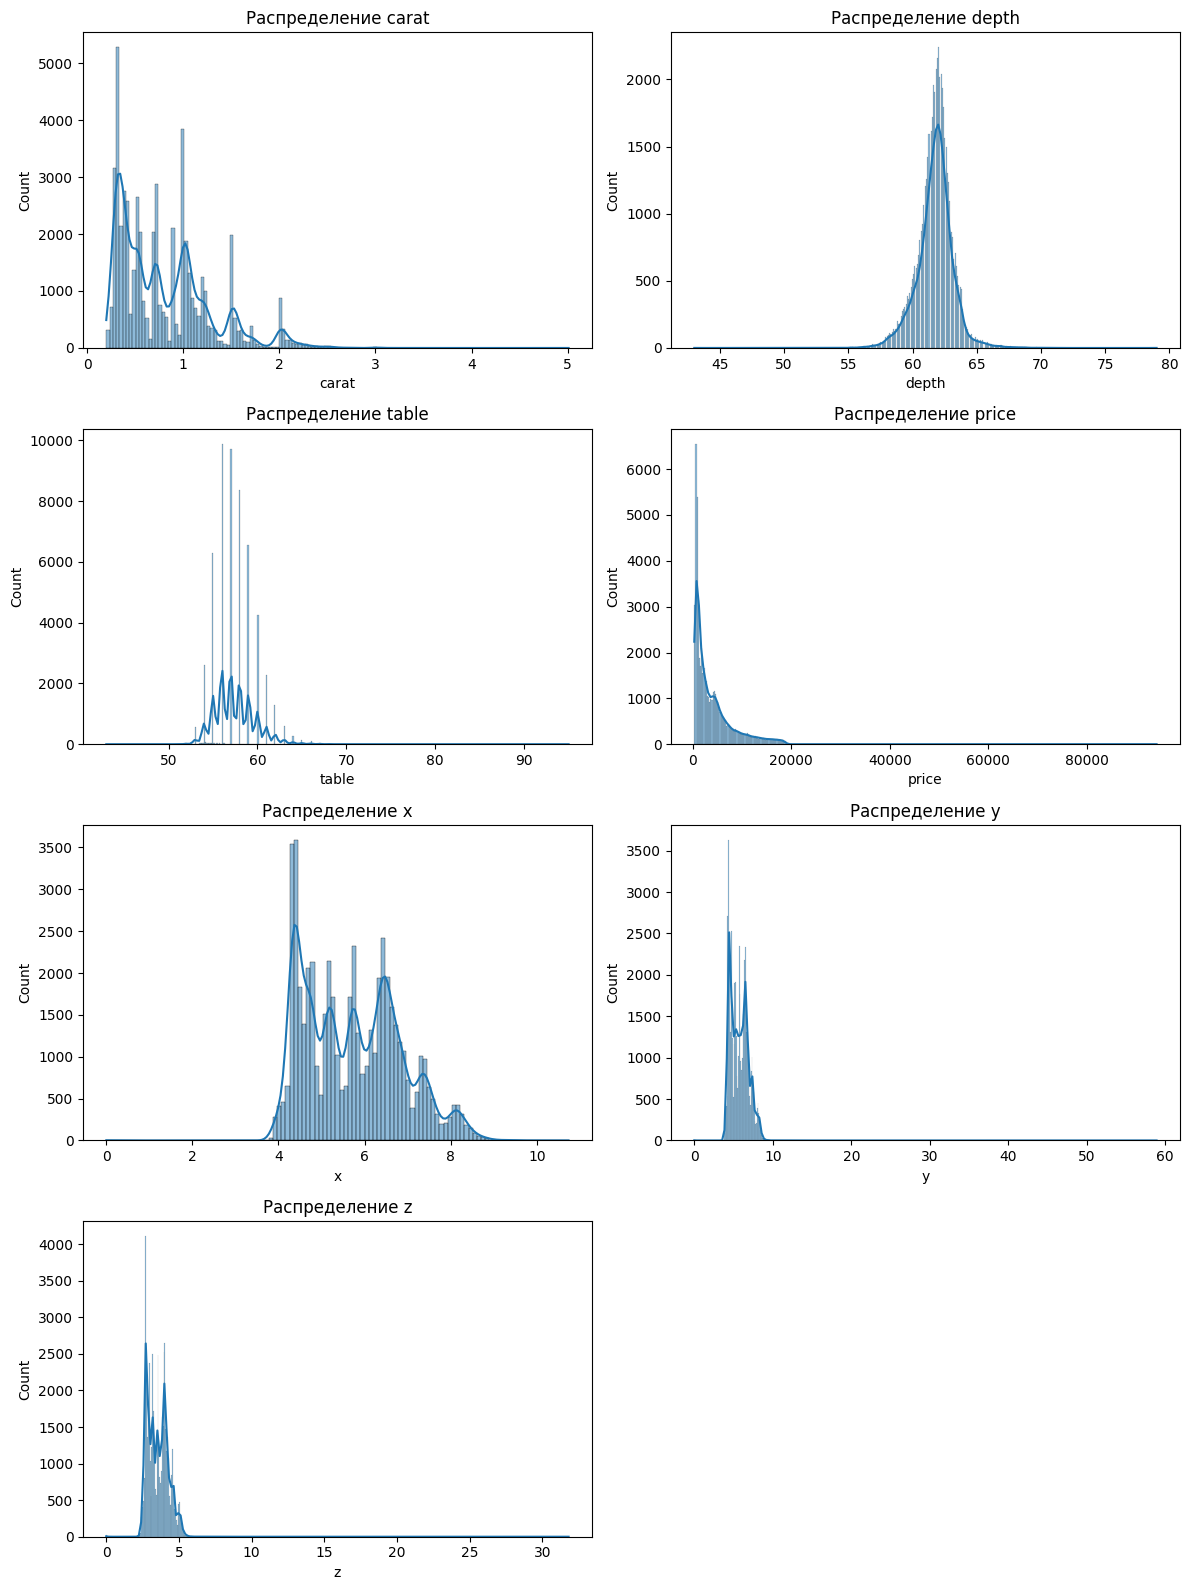

In [ ]:
numeric_cols = df.select_dtypes(include=[np.float64]).columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(12, 4*n_rows))
axes_flat = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes_flat[i])
    axes_flat[i].set_title(f'Распределение {col}')
    axes_flat[i].set_xlabel(col)

if n_cols % 2 != 0:
    axes_flat[-1].set_visible(False)

plt.tight_layout()
plt.show()


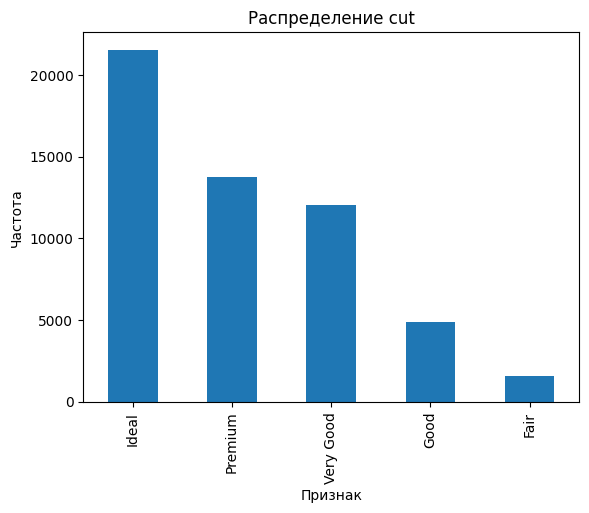

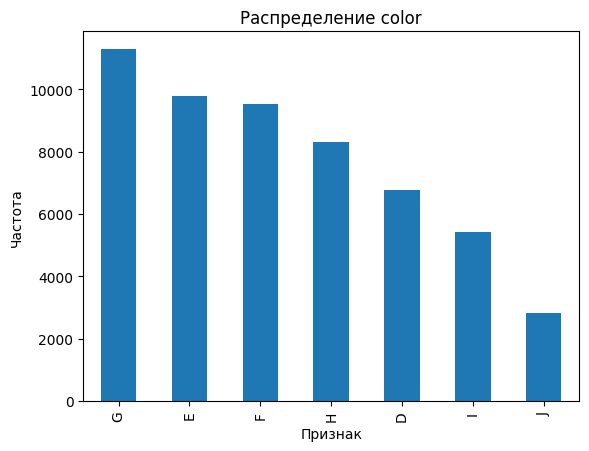

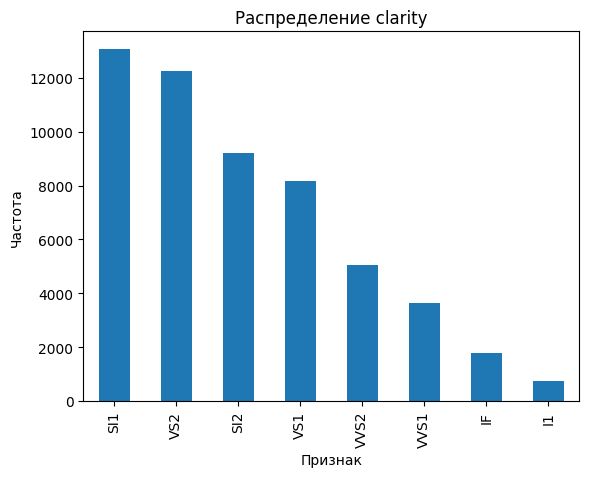

In [ ]:
for col in df.select_dtypes(include='category').columns:
  df[col].value_counts().plot(kind='bar')
  plt.title(f'Распределение {col}')
  plt.xlabel('Признак')
  plt.ylabel('Частота')
  plt.show()


In [ ]:
df.nunique()

,0
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552
z,375


In [ ]:
print("Доля пропусков:")
print((df.isnull().sum() / df.count()).sort_values(ascending=False))

print(f'Количество полных дубликатов: {df.duplicated().sum()}')

subset_cols = ['carat', 'cut', 'color', 'price', 'depth', 'clarity', 'table']
print(f'Количество частичных дубликатов: {df.duplicated(subset=subset_cols).sum()}')


Доля пропусков:
carat      0.000278
cut        0.000278
color      0.000278
clarity    0.000278
price      0.000278
depth      0.000000
table      0.000000
x          0.000000
y          0.000000
z          0.000000
dtype: float64
Количество полных дубликатов: 151
Количество частичных дубликатов: 805


In [ ]:
print(f'''
Кол-во строк: {len(df)}
Кол-во дубликатов: {df.duplicated().sum()}
Кол-во уникальных строк: {len(df.drop_duplicates())}
''')

df = df.drop_duplicates().reset_index(drop=True)
print(f'''
Кол-во дубликатов после чистки: {df.duplicated().sum()}
Кол-во строк после чистки: {len(df)}
''')



Кол-во строк: 53945
Кол-во дубликатов: 151
Кол-во уникальных строк: 53794


Кол-во дубликатов после чистки: 0
Кол-во строк после чистки: 53794



In [ ]:
df['price'] = df['price'].fillna(df['price'].median())
df['carat'] = df['carat'].fillna(df['carat'].median())
df['depth'] = df['depth'].fillna(df['depth'].median())
df['cut'] = df['cut'].fillna(df['cut'].mode()[0])
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['clarity'] = df['clarity'].fillna(df['clarity'].mode()[0])
df.isnull().sum().sort_values(ascending=False)

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

df['cut'] = pd.Categorical(df['cut'], categories=cut_order, ordered=True)
df['color'] = pd.Categorical(df['color'], categories=color_order, ordered=True)
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)
df['cut'] = df['cut'].cat.codes + 1
df['color'] = df['color'].cat.codes + 1
df['clarity'] = df['clarity'].cat.codes + 1

print(df.head(12))

    carat  cut  color  clarity  depth  table  price     x     y     z
0    0.23    5      6        2   61.5   55.0  326.0  3.95  3.98  2.43
1    0.21    4      6        3   59.8   61.0  326.0  3.89  3.84  2.31
2    0.23    2      6        5   56.9   65.0  327.0  4.05  4.07  2.31
3    0.29    4      2        4   62.4   58.0  334.0  4.20  4.23  2.63
4    0.31    2      1        2   63.3   58.0  335.0  4.34  4.35  2.75
5    0.24    3      1        6   62.8   57.0  336.0  3.94  3.96  2.48
6    0.24    3      2        7   62.3   57.0  336.0  3.95  3.98  2.47
7    0.26    3      3        3   61.9   55.0  337.0  4.07  4.11  2.53
8    0.22    1      6        4   65.1   61.0  337.0  3.87  3.78  2.49
9    0.23    3      3        5   59.4   61.0  338.0  4.00  4.05  2.39
10   0.30    2      1        3   64.0   55.0  339.0  4.25  4.28  2.73
11   0.23    5      1        5   62.8   56.0  340.0  3.93  3.90  2.46


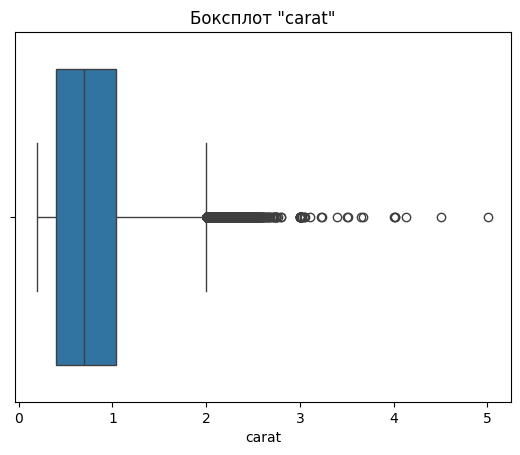

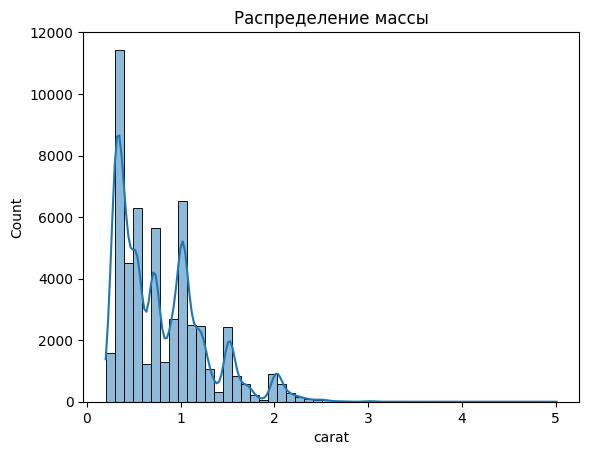

In [ ]:
sns.boxplot(data=df, x='carat')
plt.title('Боксплот "carat"')
plt.show()

sns.histplot(df['carat'], kde=True, bins=50)
plt.title('Распределение массы')
plt.show()


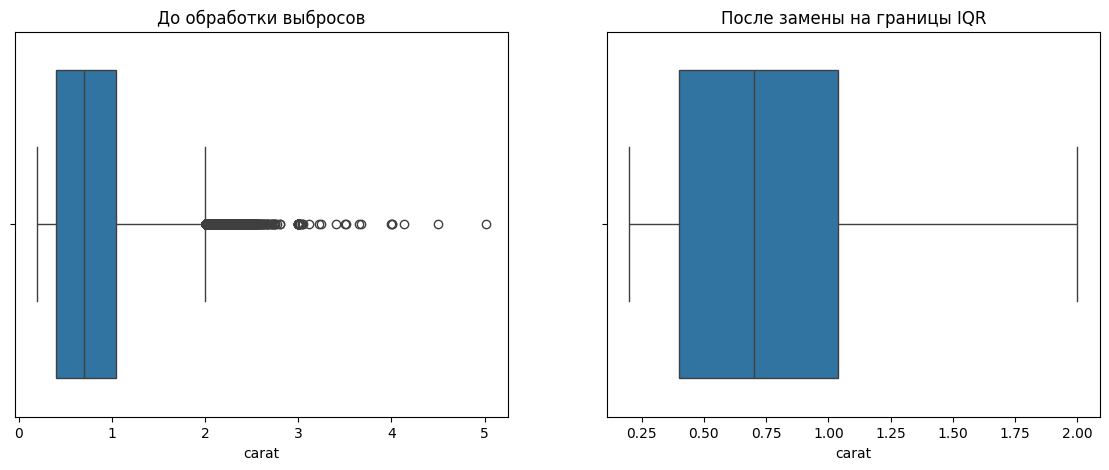

In [ ]:
def replace_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data.clip(lower=lower_bound, upper=upper_bound)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x='carat', ax=axes[0])
axes[0].set_title('До обработки выбросов')
df['carat'] = replace_outliers_iqr(df['carat'])
sns.boxplot(data=df, x='carat', ax=axes[1])
axes[1].set_title('После замены на границы IQR')
plt.show()


In [ ]:
for col in numeric_cols:
        skew_val = df[col].skew()
        if skew_val > 1:
            comment = "Сильная правосторонняя асимметрия"
        elif skew_val > 0.5:
            comment = "Умеренная правосторонняя асимметрия"
        elif skew_val < -0.5:
            comment = "Умеренная левосторонняя асимметрия"
        elif skew_val < -1:
            comment = "Сильная левосторонняя асимметрия"
        else:
            comment = "Симметрично"
        print(f"{col:<11} | skew = {skew_val:>6.3f} | {comment}")


carat       | skew =  0.899 | Умеренная правосторонняя асимметрия
depth       | skew = -0.114 | Симметрично
table       | skew =  0.792 | Умеренная правосторонняя асимметрия
price       | skew =  2.506 | Сильная правосторонняя асимметрия
x           | skew =  0.380 | Симметрично
y           | skew =  2.446 | Сильная правосторонняя асимметрия
z           | skew =  1.529 | Сильная правосторонняя асимметрия


In [ ]:
df['price'] = np.log1p(df['price'])
df['carat'] = np.log1p(df['carat'])
df['table'] = np.log1p(df['table'])
df['y'] = np.log1p(df['y'])
df['z'] = np.log1p(df['z'])

from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'depth',
    'table',
    'x',
    'carat',
    'y',
    'z',
    'price'
]
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

for col in numeric_cols:
        skew_val = df[col].skew()
        if skew_val > 1:
            comment = "Сильная правосторонняя асимметрия"
        elif skew_val > 0.5:
            comment = "Умеренная правосторонняя асимметрия"
        elif skew_val < -0.5:
            comment = "Умеренная левосторонняя асимметрия"
        elif skew_val < -1:
            comment = "Сильная левосторонняя асимметрия"
        else:
            comment = "Симметрично"
        print(f"{col:<11} | skew = {skew_val:>6.3f} | {comment}")

carat       | skew =  0.494 | Симметрично
depth       | skew = -0.114 | Симметрично
table       | skew =  0.599 | Умеренная правосторонняя асимметрия
price       | skew =  0.118 | Симметрично
x           | skew =  0.380 | Симметрично
y           | skew =  0.032 | Симметрично
z           | skew = -0.132 | Симметрично


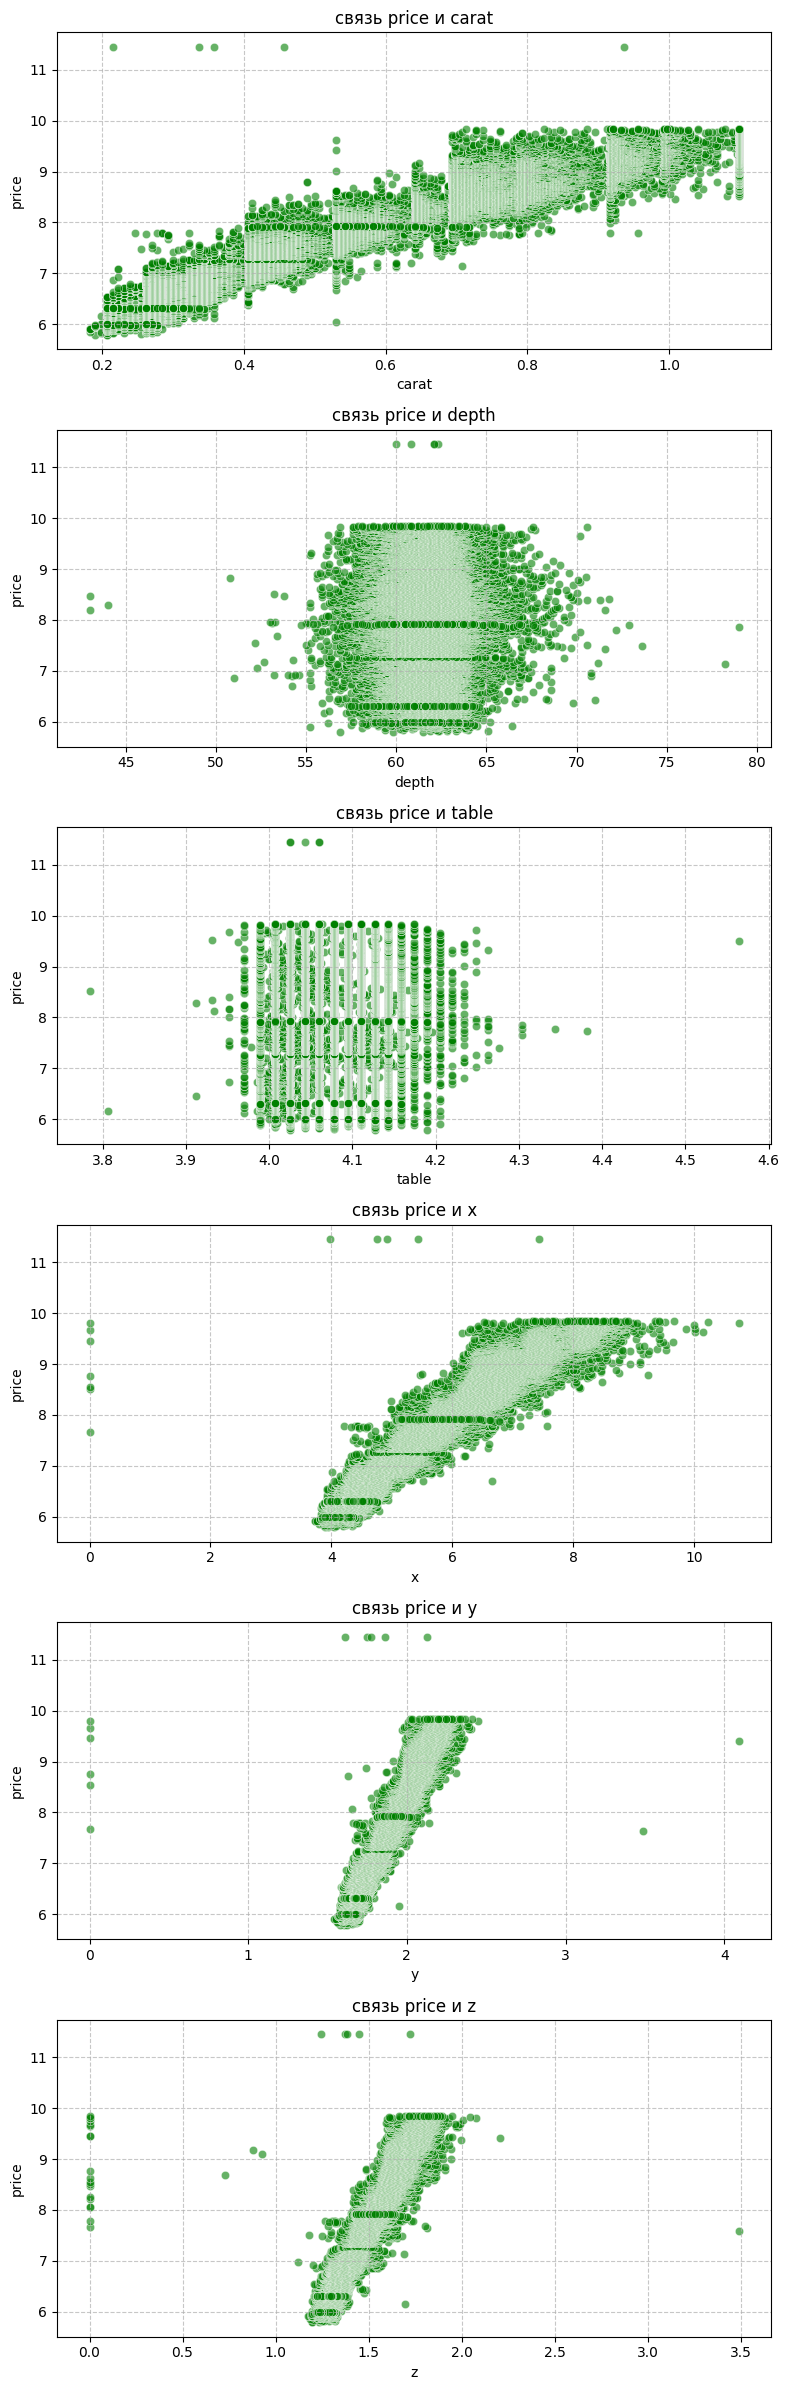

In [ ]:
numeric_cols = df.select_dtypes(include=['float']).columns.drop('price')
fig, axes = plt.subplots(nrows=len(numeric_cols), figsize=(8, 4 * len(numeric_cols)))

if len(numeric_cols) == 1:
    axes = [axes]

for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=df, x=col, y='price', ax=axes[i], alpha=0.6, color='green')
    axes[i].set_title(f'связь price и {col}')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


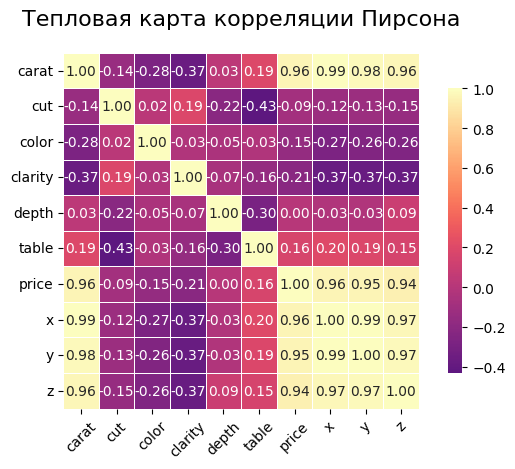

In [ ]:
corr_matrix = df.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='magma',
    center=0,
    square=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Тепловая карта корреляции Пирсона', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import f_oneway

cat_features = ['cut', 'color', 'clarity']
print("ANOVA-тест")
for feature in cat_features:
    groups = [group['price'].values for name, group in df.groupby(feature)]
    f_stat, p_value = f_oneway(*groups)
    print(f"\nПризнак: {feature}:")
    print(f"   F-статистика: {f_stat:.4f}")
    print(f"   p-value:      {p_value:.2e}")
    if p_value < 0.05:
        print(f"Статистически значимая связь с price присутствует (p < 0.05)")
    else:
        print(f"Статистически значимая связь с price отсутствует (p >= 0.05)")


ANOVA-тест

Признак: cut:
   F-статистика: 243.2221
   p-value:      2.03e-207
Статистически значимая связь с price присутствует (p < 0.05)

Признак: color:
   F-статистика: 234.4526
   p-value:      6.82e-297
Статистически значимая связь с price присутствует (p < 0.05)

Признак: clarity:
   F-статистика: 409.3060
   p-value:      0.00e+00
Статистически значимая связь с price присутствует (p < 0.05)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def vif_analysis():
    X = df.select_dtypes(include=['number']).drop(columns=['price'])  # price — целевая
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    X_const = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Признак"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    return vif_data

df = df.replace([np.inf, -np.inf], np.nan).dropna()
vif_analysis()


,Признак,VIF
0,const,33461.963052
1,carat,101.375403
2,cut,1.483388
3,color,1.113813
4,clarity,1.226179
5,depth,2.101605
6,table,1.586461
7,x,225.825323
8,y,70.510022
9,z,28.042609


In [ ]:
df['volume'] = df['x'] * df['y'] * df['z']
df = df.drop(columns=['x', 'y', 'z'])
vif_analysis()



,Признак,VIF
0,const,28233.993442
1,carat,70.725230
2,cut,1.476882
3,color,1.111349
4,clarity,1.213292
5,depth,1.374180
6,table,1.589508
7,volume,70.199995


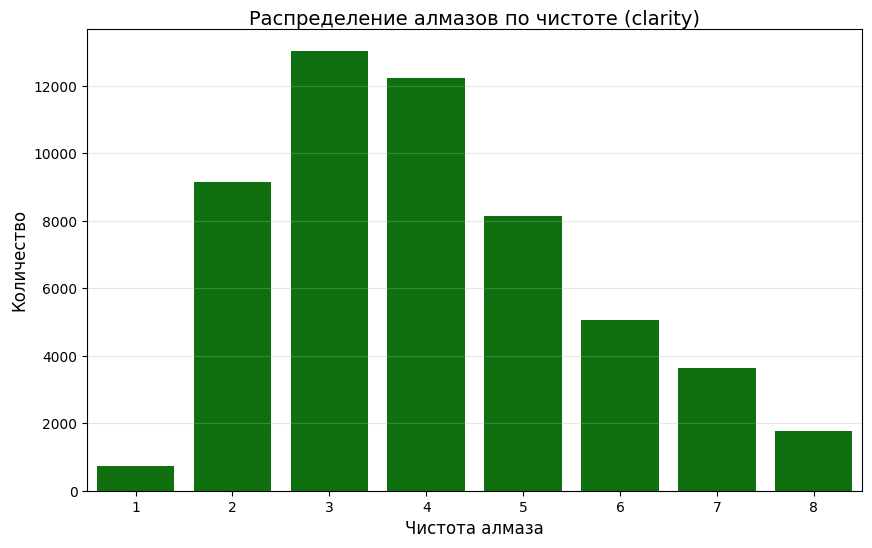

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='clarity', color='green')
plt.title('Распределение алмазов по чистоте (clarity)', fontsize=14, pad=20)
plt.xlabel('Чистота алмаза', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

После SMOTE:
clarity
1    13032
8    12841
7    12540
6    12221
2    11721
5    11277
4    10365
3    10363
Name: count, dtype: int64


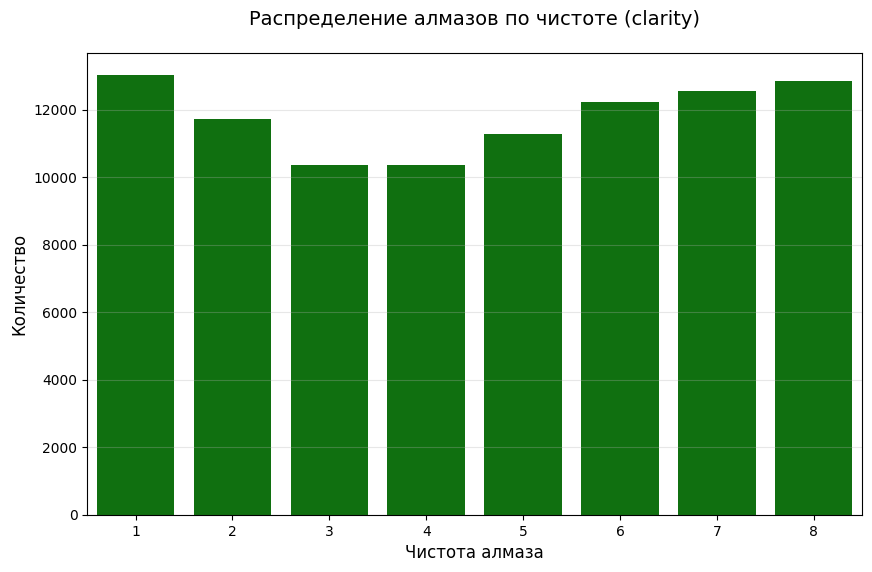

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder

X = df.select_dtypes(include=['number']).drop(columns=['clarity'])
y = df['clarity']

smote_tomek = SMOTETomek(random_state=42)
X_res, y_res = smote_tomek.fit_resample(X, y)
new_df = pd.DataFrame(X_res, columns=X.columns)
new_df['clarity'] = y_res

print("После SMOTE:")
print(pd.Series(y_res).value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='clarity', color='green')
plt.title('Распределение алмазов по чистоте (clarity)', fontsize=14, pad=20)
plt.xlabel('Чистота алмаза', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()



PCA: доля объяснённой дисперсии
PC1: 0.882
PC2: 0.052
Суммарно: 0.934


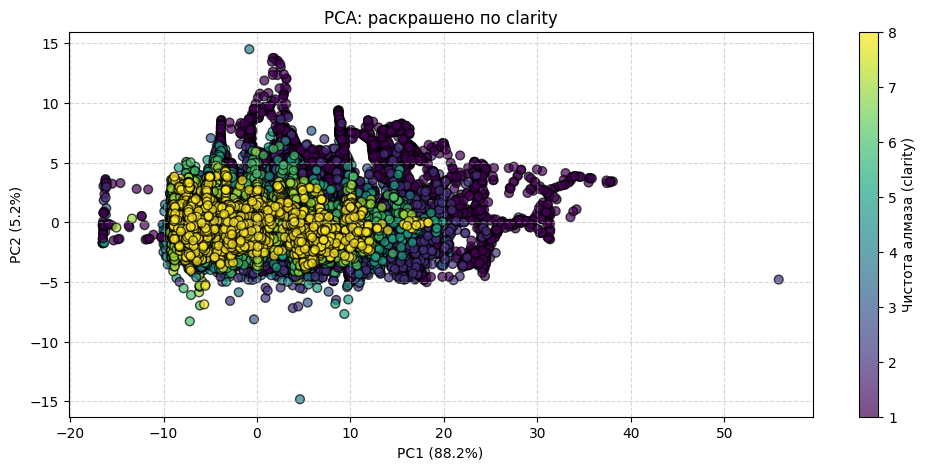

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

df_t = new_df.copy()
feature_cols = df_t.select_dtypes(include=['number']).columns.drop('clarity')
X = df_t[feature_cols]  # carat, cut, color, price, depth, table, x, y, z

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['clarity'] = df_t['clarity'].values

plt.figure(figsize=(12, 5))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['clarity'], cmap='viridis', alpha=0.7, edgecolor='k', s=40)
plt.colorbar(scatter, label='Чистота алмаза (clarity)')
plt.title('PCA: раскрашено по clarity')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.grid(True, linestyle='--', alpha=0.5)
print("\nPCA: доля объяснённой дисперсии")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Суммарно: {pca.explained_variance_ratio_.sum():.3f}")
